In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df.drop(['Gender','Education Level','Job Title'],axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Years of Experience  373 non-null    float64
 2   Salary               373 non-null    float64
dtypes: float64(3)
memory usage: 8.9 KB


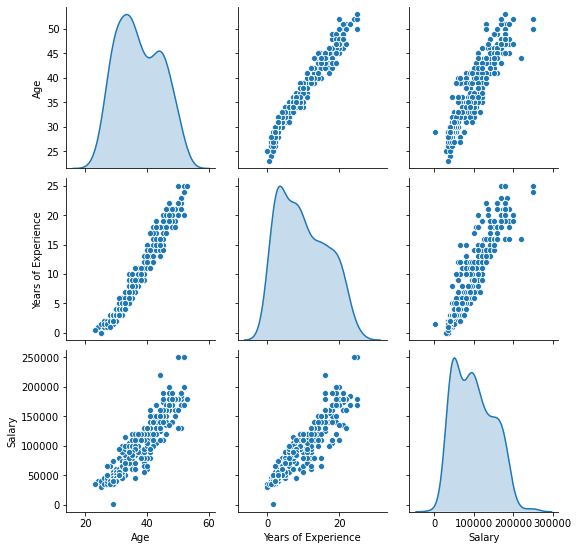

In [7]:
sns.pairplot(df,diag_kind='kde')

In [8]:
nan_values=df[df.isnull().any(axis=1)]
nan_values

,Age,Years of Experience,Salary
172,NaN,NaN,NaN
260,NaN,NaN,NaN


In [9]:
#df.dropna(inplace=True)

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Years of Experience']=df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary']=df['Salary'].fillna(df['Salary'].mean())

In [11]:
#df.isnull().sum()
df.count()

Age                    375
Years of Experience    375
Salary                 375
dtype: int64

In [12]:
df=df.append({'Age':'36','Years of Experience': '8', 'Salary': '550000'},ignore_index=True)
df

,Age,Years of Experience,Salary
0,32,5,90000
1,28,3,65000
2,45,15,150000
3,36,7,60000
4,52,20,200000
...,...,...,...
371,43,19,170000
372,29,2,40000
373,34,7,90000
374,44,15,150000


In [13]:
X=df.drop('Salary',axis=1)
y=df['Salary']

In [14]:
X

,Age,Years of Experience
0,32,5
1,28,3
2,45,15
3,36,7
4,52,20
...,...,...
371,43,19
372,29,2
373,34,7
374,44,15


In [15]:
y

0       90000
1       65000
2      150000
3       60000
4      200000
        ...  
371    170000
372     40000
373     90000
374    150000
375    550000
Name: Salary, Length: 376, dtype: object

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(X_test)
y_pred

array([ 68325.55845266,  54944.96186493,  88335.47000859,  43784.30082087,
       161989.73456682,  52694.53465841,  86146.02612775,  90585.8972151 ,
       144169.26689174,  41503.38195151,  95086.75162814,  54944.96186493,
       148609.13797909,  57134.40574576, 101777.04992201,  28122.78536377,
       101777.04992201,  39283.44640783, 115157.64650974,  88396.45333427,
        52694.53465841,  63824.70403963, 159739.30736031, 103966.49380284,
        88335.47000859, 173119.90394804, 175370.33115456,  95086.75162814,
        54944.96186493, 124037.38868445,  83956.58224692,  77205.30062737,
       166429.60565418,  92775.34109594,  63885.68736531,  77266.28395305,
       115157.64650974,  59384.83295228,  81706.1550404 ,  99587.60604117,
        86146.02612775, 124037.38868445, 144169.26689174, 101777.04992201,
       162050.71789251, 119658.50092278, 115157.64650974,  52694.53465841,
       101716.06659633, 126287.81589096,  92836.32442162, 100634.87284352,
        88396.45333427, 1

In [21]:
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score,classification_report,accuracy_score

In [22]:
print("MAE -",mean_absolute_error(y_pred,y_test))
print("MSE -",mean_squared_error(y_pred,y_test))
print("R2 Score -",r2_score(y_pred,y_test))

MAE - 17785.875576735492
MSE - 3043819906.100568
R2 Score - -0.9100450267384501


In [23]:
my_dict={'Actual': y_test, 'Predicted': y_pred}
my_df=pd.DataFrame(my_dict)

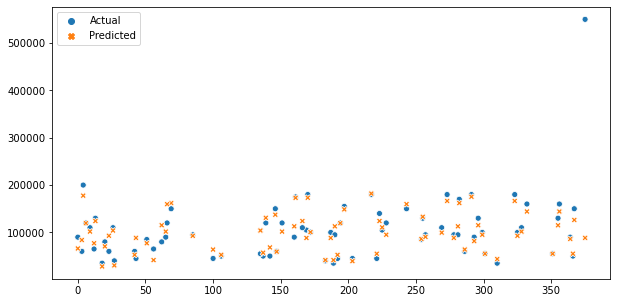

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=my_df)
plt.show()

# Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=MinMaxScaler()
norm_fit=scaler.fit_transform(df)

In [27]:
norm_df=pd.DataFrame(data=norm_fit)
norm_df

,0,1,2
0,0.300000,0.20,0.163104
1,0.166667,0.12,0.117620
2,0.733333,0.60,0.272264
3,0.433333,0.28,0.108524
4,0.966667,0.80,0.363231
...,...,...,...
371,0.666667,0.76,0.308651
372,0.200000,0.08,0.072137
373,0.366667,0.28,0.163104
374,0.700000,0.60,0.272264


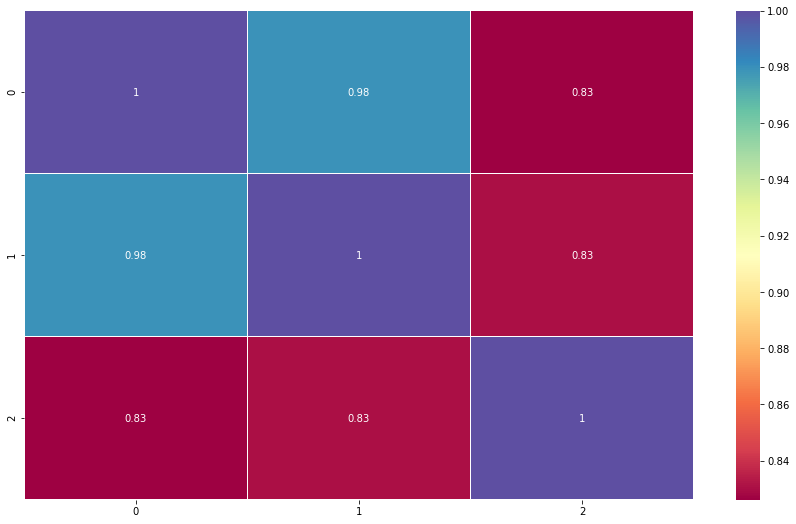

In [28]:
plt.figure(figsize = (15, 9))
sns.heatmap(norm_df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

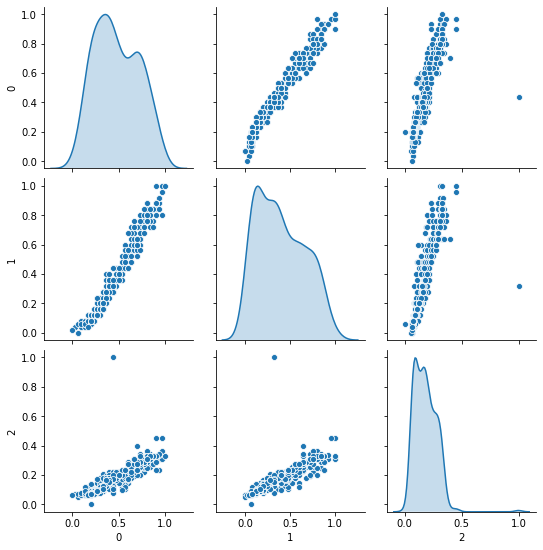

In [29]:
sns.pairplot(norm_df,diag_kind='kde')

In [30]:
norm_X=norm_df.drop(2,axis=1)

In [31]:
norm_y=norm_df[2]

In [32]:
norm_y

0      0.163104
1      0.117620
2      0.272264
3      0.108524
4      0.363231
         ...   
371    0.308651
372    0.072137
373    0.163104
374    0.272264
375    1.000000
Name: 2, Length: 376, dtype: float64

In [33]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(norm_X, norm_y,test_size=0.2, random_state=40)

In [34]:
lr.fit(X_train_norm,y_train_norm)

LinearRegression()

In [35]:
lr.intercept_

0.042339545075479934

In [36]:
y_pred_norm=lr.predict(X_test_norm)

In [37]:
y_pred_norm

array([0.12367062, 0.09932677, 0.16007545, 0.07902174, 0.29407757,
       0.09523248, 0.15609211, 0.16416974, 0.26165608, 0.07487198,
       0.17235832, 0.09932677, 0.26973372, 0.10331012, 0.18453025,
       0.05052813, 0.18453025, 0.07083316, 0.2088741 , 0.1601864 ,
       0.09523248, 0.11548204, 0.28998328, 0.18851359, 0.16007545,
       0.31432712, 0.31842142, 0.17235832, 0.09932677, 0.22502936,
       0.15210876, 0.13982589, 0.3021552 , 0.16815308, 0.11559299,
       0.13993684, 0.2088741 , 0.10740441, 0.14801447, 0.1805469 ,
       0.15609211, 0.22502936, 0.26165608, 0.18453025, 0.29418852,
       0.21706268, 0.2088741 , 0.09523248, 0.1844193 , 0.22912365,
       0.16826403, 0.18245224, 0.1601864 , 0.28998328, 0.31443807,
       0.07487198, 0.20079646, 0.18862454, 0.2047798 , 0.3021552 ,
       0.33059334, 0.32262666, 0.21695173, 0.07492745, 0.11957633,
       0.22514031, 0.16826403, 0.09932677, 0.12776492, 0.05451147,
       0.24140653, 0.1601864 , 0.24937321, 0.2047798 , 0.23731

In [38]:
print("MAE -",mean_absolute_error(y_pred_norm,y_test_norm))
print("MSE -",mean_squared_error(y_pred_norm,y_test_norm))
print("R2 Score -",r2_score(y_pred_norm,y_test_norm))

MAE - 0.0323585473969535
MSE - 0.01007503325524715
R2 Score - -0.9100450267384512


In [39]:
my_dict_norm={'Actual': y_test_norm, 'Predicted': y_pred_norm}
my_norm_df=pd.DataFrame(my_dict_norm)

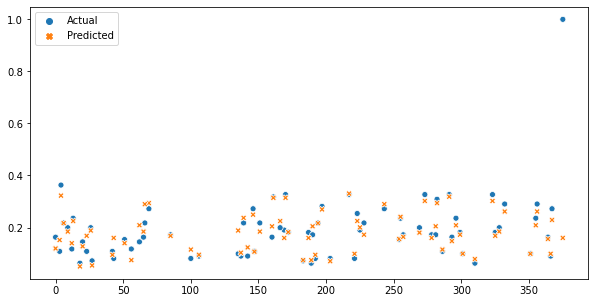

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=my_norm_df)
plt.show()

# Standardization

In [41]:
std_df=df
std_df

,Age,Years of Experience,Salary
0,32,5,90000
1,28,3,65000
2,45,15,150000
3,36,7,60000
4,52,20,200000
...,...,...,...
371,43,19,170000
372,29,2,40000
373,34,7,90000
374,44,15,150000


In [42]:
std_scaler=StandardScaler()
std_fit=std_scaler.fit_transform(std_df)
std_fit

array([[-0.77190202, -0.77043177, -0.22098332],
       [-1.34074985, -1.07704504, -0.69025724],
       [ 1.07685342,  0.76263461,  0.90527409],
       ...,
       [-0.48747811, -0.46381849, -0.22098332],
       [ 0.93464146,  0.76263461,  0.90527409],
       [-0.20305419, -0.31051185,  8.41365683]])

In [43]:
std_fit_df=pd.DataFrame(data=std_fit)
std_fit_df

,0,1,2
0,-0.771902,-0.770432,-0.220983
1,-1.340750,-1.077045,-0.690257
2,1.076853,0.762635,0.905274
3,-0.203054,-0.463818,-0.784112
4,2.072337,1.529168,1.843822
...,...,...,...
371,0.792430,1.375861,1.280693
372,-1.198538,-1.230352,-1.159531
373,-0.487478,-0.463818,-0.220983
374,0.934641,0.762635,0.905274


In [44]:
std_fit_df.describe().round(3)

,0,1,2
count,376.000,376.000,376.000
mean,0.000,0.000,-0.000
std,1.001,1.001,1.001
min,-2.052,-1.537,-1.904
25%,-0.807,-0.924,-0.878
50%,-0.203,-0.157,-0.127
75%,0.935,0.763,0.718
max,2.215,2.296,8.414


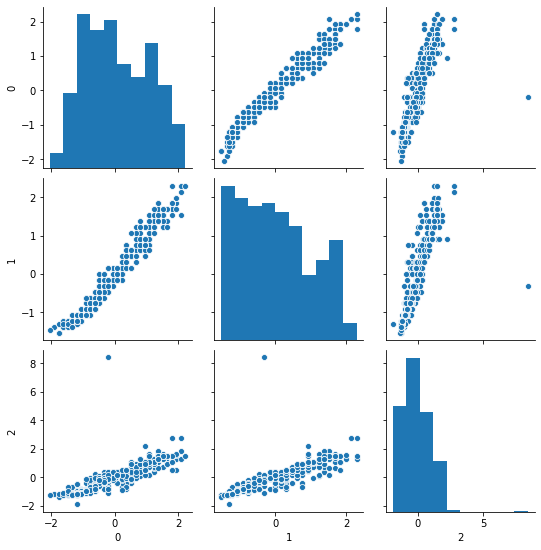

In [45]:
sns.pairplot(std_fit_df)

In [46]:
std_x=std_fit_df.drop(2,axis=1)
std_x

,0,1
0,-0.771902,-0.770432
1,-1.340750,-1.077045
2,1.076853,0.762635
3,-0.203054,-0.463818
4,2.072337,1.529168
...,...,...
371,0.792430,1.375861
372,-1.198538,-1.230352
373,-0.487478,-0.463818
374,0.934641,0.762635


In [47]:
std_y=std_fit_df[2]
std_y

0     -0.220983
1     -0.690257
2      0.905274
3     -0.784112
4      1.843822
         ...   
371    1.280693
372   -1.159531
373   -0.220983
374    0.905274
375    8.413657
Name: 2, Length: 376, dtype: float64

In [48]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(std_x, std_y,test_size=0.2, random_state=40)

In [49]:
lr.fit(X_train_std, y_train_std)

LinearRegression()

In [50]:
lr.intercept_

-0.021967557056159357

In [51]:
y_pred_std=lr.predict(X_test_std)

In [52]:
print("MAE -",mean_absolute_error(y_pred_std,y_test))
print("MSE -",mean_squared_error(y_pred_std,y_test))
print("R2 Score -",r2_score(y_pred_std,y_test))

MAE - 106191.83291136927
MSE - 15801470839.854181
R2 Score - -28141636130.99864


In [53]:
my_dict_std={'Actual': y_test_std, 'Predicted': y_pred_std}
my_std_df=pd.DataFrame(my_dict_std)

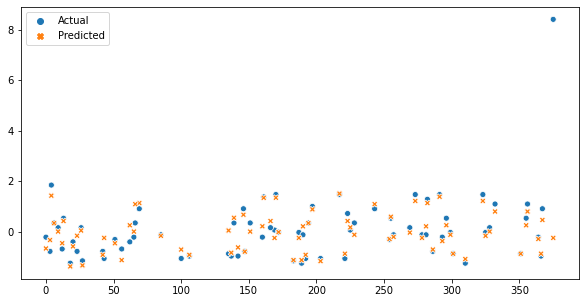

In [54]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=my_std_df)
plt.show()

# Using Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
#pre-pruning
parameter={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4],
    'max_features':['auto','sqrt','log2']
}

In [57]:
regressor= DecisionTreeRegressor()
cv=GridSearchCV(regressor,param_grid=parameter,cv=5,scoring='accuracy')

In [58]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [59]:
#from sklearn import tree
#plt.figure(figsize=(50,20))
#tree.plot_tree(regressor,filled=True)

In [60]:
#predicting the new value
#y_pred_tree=regressor.predict(X_test).round()

In [61]:
#y_pred_tree

In [62]:
# print("MAE -",mean_absolute_error(y_pred_tree,y_test))
# print("MSE -",mean_squared_error(y_pred_tree,y_test))
# print("R2 Score -",r2_score(y_pred_tree,y_test))

In [63]:
# my_dict_tree={'Actual': y_test, 'Predicted': y_pred_tree}
# my_tree_df=pd.DataFrame(my_dict_tree)

In [64]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(data=my_std_df)
# plt.show()

In [65]:
cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [66]:
y_pred_cv=cv.predict(X_test).round()

In [67]:
print("MAE -",mean_absolute_error(y_pred_cv,y_test))
print("MSE -",mean_squared_error(y_pred_cv,y_test))
print("R2 Score -",r2_score(y_pred_cv,y_test))

MAE - 31172.49139269084
MSE - 3867740817.4043884
R2 Score - -1.7709612206863885


In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rfr=RandomForestRegressor()

In [70]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
y_pred_rfr=rfr.predict(X_test)

In [72]:
y_pred_rfr

array([ 63616.27705628,  50000.        , 101418.52813853,  29943.2625    ,
       178959.02292152,  48364.6031746 ,  86899.65034965, 101497.69480519,
       161179.25213675,  42598.92857143,  97984.68253968,  50000.        ,
       152430.3968254 ,  55772.24206349,  97976.11111111,  33133.45238095,
        97976.11111111,  43450.        ,  97068.69047619,  92617.23207348,
        48364.6031746 ,  49987.97619048, 151622.5       , 106120.41420912,
       101418.52813853, 179457.14285714, 175492.93650794,  97984.68253968,
        50000.        ,  85294.16666667,  70545.75396825,  94685.87301587,
       160245.23809524, 114713.45238095,  60033.33333333,  80476.01190476,
        97068.69047619,  57867.93470418,  82758.45238095, 104316.41414141,
        86899.65034965,  85294.16666667, 161179.25213675,  97976.11111111,
       159801.66666667, 113768.33333333,  97068.69047619,  48364.6031746 ,
       113194.10679178, 123531.54761905,  97845.31385281, 104330.87109026,
        92617.23207348, 1

In [73]:
print("MAE -",mean_absolute_error(y_pred_rfr,y_test))
print("MSE -",mean_squared_error(y_pred_rfr,y_test))
print("R2 Score -",r2_score(y_pred_rfr,y_test))

MAE - 17811.06620881597
MSE - 3032078459.6739035
R2 Score - -0.899455079548303
